In [1]:
# import necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
# reading dataset
chronic_df = pd.read_csv('kidney_disease.csv')
pd.set_option('display.max_columns', None)
chronic_df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35,7300,4.6,no,no,no,good,no,no,ckd


## **`Dataset Description`**


age - age

bp - blood pressure

sg - specific gravity

al - albumin

su - sugar

rbc - red blood cells

pc - pus cell

pcc - pus cell clumps

ba - bacteria

bgr - blood glucose random

bu - blood urea

sc - serum creatinine

sod - sodium

pot - potassium

hemo - hemoglobin

pcv - packed cell volume

wc - white blood cell count

rc - red blood cell count

htn - hypertension

dm - diabetes mellitus

cad - coronary artery disease

appet - appetite

pe - pedal edema

ane - anemia

class - class




- Additional Feature Details

Attribute Information:

We use 24 + class = 25 ( 11 numeric ,14 nominal)

Age(numerical) - age in years

Blood Pressure(numerical) - bp in mm/Hg

Specific Gravity(nominal) - sg - (1.005,1.010,1.015,1.020,1.025)

Albumin(nominal) - al - (0,1,2,3,4,5)

Sugar(nominal) - su - (0,1,2,3,4,5)

Red Blood Cells(nominal) - rbc - (normal,abnormal)

Pus Cell (nominal) - pc - (normal,abnormal)

Pus Cell clumps(nominal) - pcc - (present,notpresent)

Bacteria(nominal) - ba - (present,notpresent)

Blood Glucose Random(numerical) - bgr in mgs/dl

Blood Urea(numerical) -bu in mgs/dl

Serum Creatinine(numerical) - sc in mgs/dl

Sodium(numerical) - sod in mEq/L

Potassium(numerical) - pot in mEq/L

Hemoglobin(numerical) - hemo in gms

Packed Cell Volume(numerical)

White Blood Cell Count(numerical) - wc in cells/cumm

Red Blood Cell Count(numerical) - rc in millions/cmm

Hypertension(nominal) - htn - (yes,no)

Diabetes Mellitus(nominal) - dm - (yes,no)

Coronary Artery Disease(nominal) - cad - (yes,no)

Appetite(nominal) - appet - (good,poor)

Pedal Edema(nominal) - pe - (yes,no)

Anemia(nominal) - ane - (yes,no)

Class (nominal)- class - (ckd,notckd)



In [3]:
# checking info of columns and null values

chronic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

## Data Cleaning

In [4]:
# drop id column
chronic_df = chronic_df.drop('id',axis=1)

chronic_df.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35,7300,4.6,no,no,no,good,no,no,ckd


In [5]:
# rename column names to make it more user-friendly

chronic_df.columns = ['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar', 'red_blood_cells', 'pus_cell',
              'pus_cell_clumps', 'bacteria', 'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
              'potassium', 'haemoglobin', 'packed_cell_volume', 'white_blood_cell_count', 'red_blood_cell_count',
              'hypertension', 'diabetes_mellitus', 'coronary_artery_disease', 'appetite', 'peda_edema',
              'aanemia', 'class']

In [6]:
chronic_df.head()

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,haemoglobin,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia,class
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35,7300,4.6,no,no,no,good,no,no,ckd


According to the data description

Columns pcv(packed cell volume), wc(white blood cell count) and rc(red blood cell count) needs to convert back in numerical since it is object right now

Columns sg(specific gravity), al(albumin) and su(sugar) should be nominal , convert from float to object

In [7]:
# Categorical cols like specific_gravity, albumin and sugar which is float type right now
# converting back to nominal data type categorical

chronic_df[['specific_gravity', 'albumin','sugar']]=chronic_df[['specific_gravity', 'albumin','sugar']].astype('object')

In [8]:
# converting necessary columns like packed_cell_volume, white-blood_cell_count and red_blood_cell_count
# currently it is in object type and converting back to numerical type
# here we use pf>to_numeric as there are null values present

chronic_df['packed_cell_volume']= pd.to_numeric(chronic_df['packed_cell_volume'],errors='coerce')
chronic_df['white_blood_cell_count']= pd.to_numeric(chronic_df['white_blood_cell_count'],errors='coerce')
chronic_df['red_blood_cell_count']= pd.to_numeric(chronic_df['red_blood_cell_count'],errors='coerce')

In [9]:
chronic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      391 non-null    float64
 1   blood_pressure           388 non-null    float64
 2   specific_gravity         353 non-null    object 
 3   albumin                  354 non-null    object 
 4   sugar                    351 non-null    object 
 5   red_blood_cells          248 non-null    object 
 6   pus_cell                 335 non-null    object 
 7   pus_cell_clumps          396 non-null    object 
 8   bacteria                 396 non-null    object 
 9   blood_glucose_random     356 non-null    float64
 10  blood_urea               381 non-null    float64
 11  serum_creatinine         383 non-null    float64
 12  sodium                   313 non-null    float64
 13  potassium                312 non-null    float64
 14  haemoglobin              3

In [10]:
# Extracting categorical and numerical columns

cat_cols=list(chronic_df.select_dtypes(include='object').columns)

num_cols=list(chronic_df.select_dtypes(exclude='object').columns)

In [11]:
cat_cols

['specific_gravity',
 'albumin',
 'sugar',
 'red_blood_cells',
 'pus_cell',
 'pus_cell_clumps',
 'bacteria',
 'hypertension',
 'diabetes_mellitus',
 'coronary_artery_disease',
 'appetite',
 'peda_edema',
 'aanemia',
 'class']

In [12]:
num_cols

['age',
 'blood_pressure',
 'blood_glucose_random',
 'blood_urea',
 'serum_creatinine',
 'sodium',
 'potassium',
 'haemoglobin',
 'packed_cell_volume',
 'white_blood_cell_count',
 'red_blood_cell_count']

In [13]:
# by looping & looking at unique values in categorical columns

for col in cat_cols:
    print(f'{col} has {chronic_df[col].unique()} values\n')

specific_gravity has [1.02 1.01 1.005 1.015 nan 1.025] values

albumin has [1.0 4.0 2.0 3.0 0.0 nan 5.0] values

sugar has [0.0 3.0 4.0 1.0 nan 2.0 5.0] values

red_blood_cells has [nan 'normal' 'abnormal'] values

pus_cell has ['normal' 'abnormal' nan] values

pus_cell_clumps has ['notpresent' 'present' nan] values

bacteria has ['notpresent' 'present' nan] values

hypertension has ['yes' 'no' nan] values

diabetes_mellitus has ['yes' 'no' ' yes' '\tno' '\tyes' nan] values

coronary_artery_disease has ['no' 'yes' '\tno' nan] values

appetite has ['good' 'poor' nan] values

peda_edema has ['no' 'yes' nan] values

aanemia has ['no' 'yes' nan] values

class has ['ckd' 'ckd\t' 'notckd'] values



In [14]:
# replace incorrect values like '\tno' with no, '\tyes' with ' yes', 'ckd\t' with 'notckd'  in categorical cols

chronic_df['diabetes_mellitus'].replace({' yes':'yes','\tno':'no','\tyes':'yes'},inplace=True)
chronic_df['coronary_artery_disease'].replace({'\tno':'no'},inplace=True)
chronic_df['class'].replace({'ckd\t':'ckd'},inplace=True)

In [15]:
# Converting target col class into 0(chronic kidney) and 1(not a chronic kidney)

chronic_df['class']=chronic_df['class'].map({'ckd':0,'notckd':1})



# coverting target col into numeric to check correlation

chronic_df['class']=pd.to_numeric(chronic_df['class'],errors='coerce')


In [16]:
chronic_df.head()

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,haemoglobin,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia,class
0,48.0,80.0,1.02,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44.0,7800.0,5.2,yes,yes,no,good,no,no,0
1,7.0,50.0,1.02,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38.0,6000.0,NaN,no,no,no,good,no,no,0
2,62.0,80.0,1.01,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31.0,7500.0,NaN,no,yes,no,poor,no,yes,0
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,0
4,51.0,80.0,1.01,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35.0,7300.0,4.6,no,no,no,good,no,no,0


In [17]:
# let's see the cols in numerical col list

num_cols

['age',
 'blood_pressure',
 'blood_glucose_random',
 'blood_urea',
 'serum_creatinine',
 'sodium',
 'potassium',
 'haemoglobin',
 'packed_cell_volume',
 'white_blood_cell_count',
 'red_blood_cell_count']

## EDA

<Figure size 1500x600 with 0 Axes>

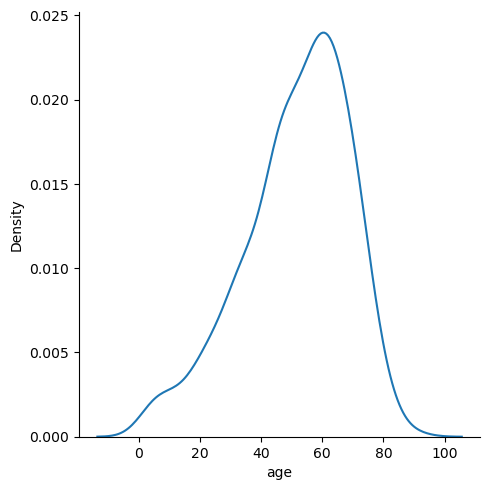

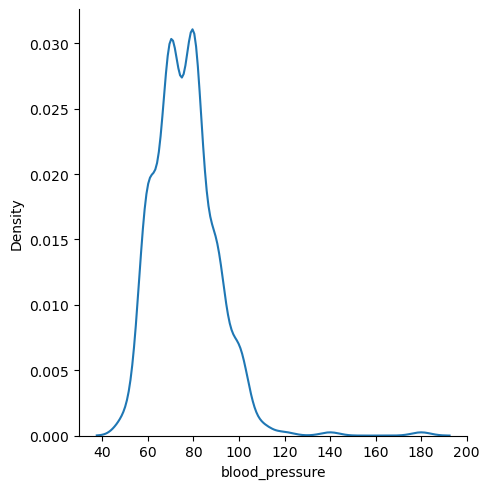

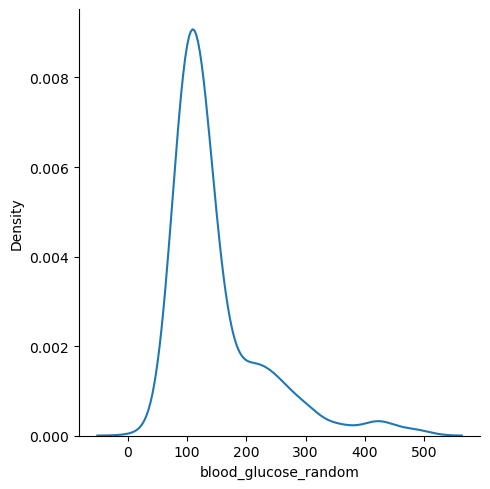

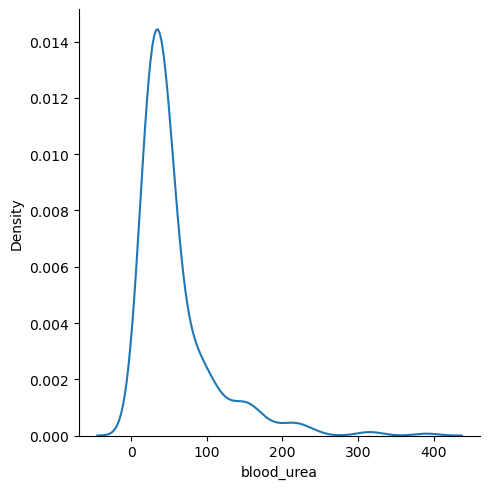

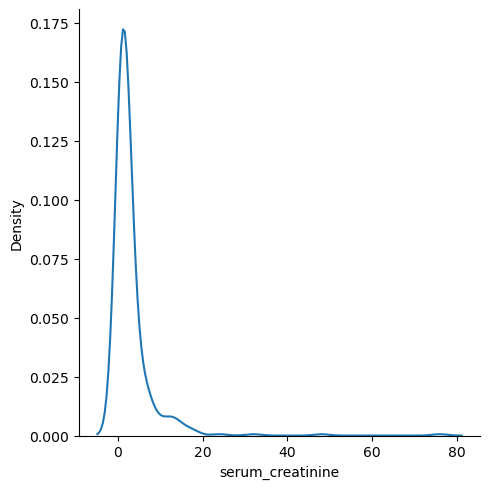

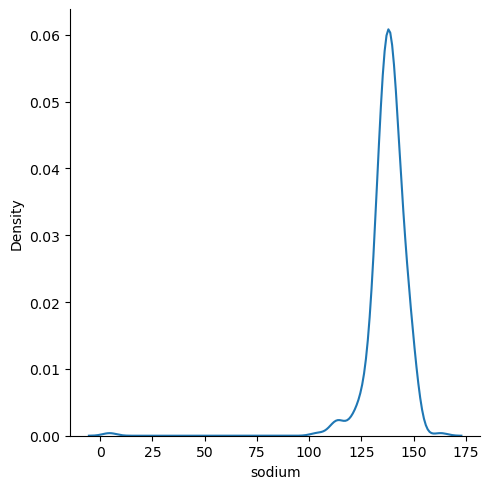

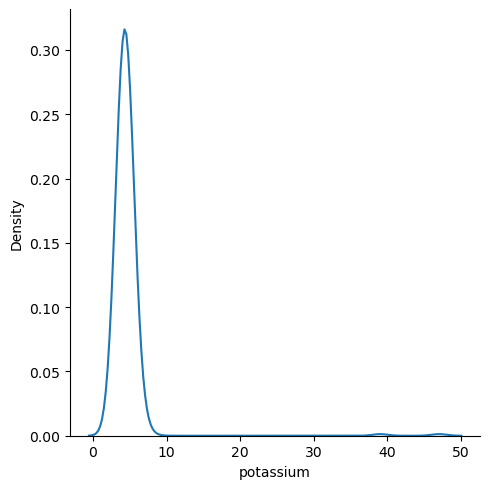

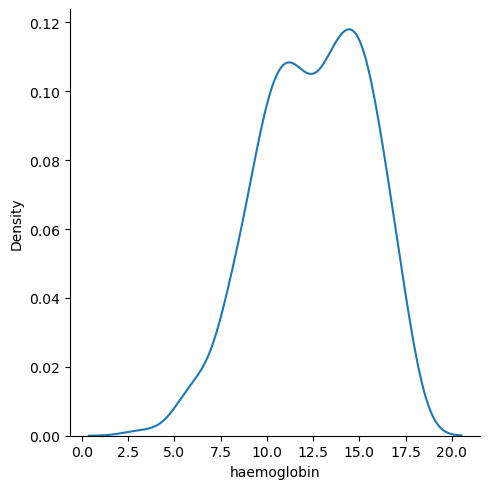

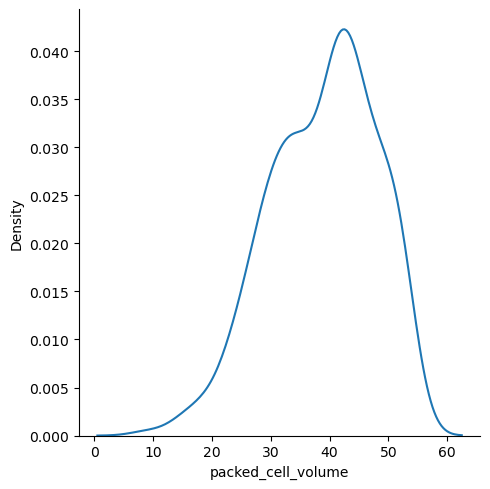

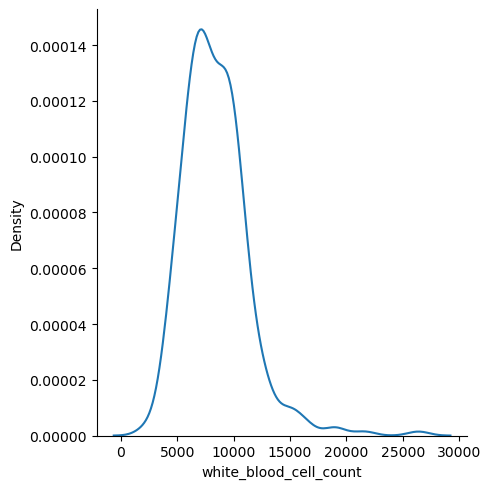

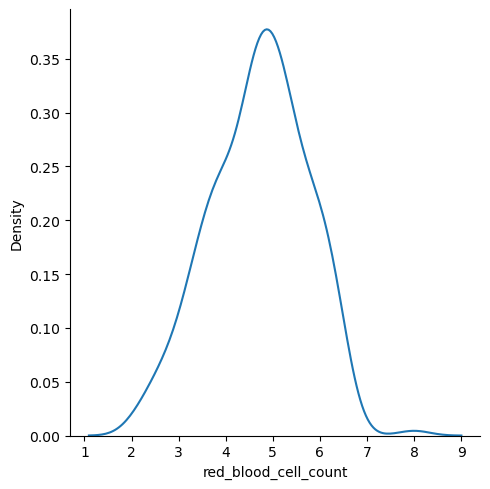

In [18]:
# checking numerical features distribution


plt.figure(figsize=(15,6))

length=list(range(len(num_cols)))
# looping over num cols and checking its distribution

for col in num_cols:

    sns.displot(chronic_df[col],kind='kde')
plt.show()

In [19]:
list(range(len(num_cols)))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [20]:
# let's see the cols in cat col list

cat_cols

['specific_gravity',
 'albumin',
 'sugar',
 'red_blood_cells',
 'pus_cell',
 'pus_cell_clumps',
 'bacteria',
 'hypertension',
 'diabetes_mellitus',
 'coronary_artery_disease',
 'appetite',
 'peda_edema',
 'aanemia',
 'class']

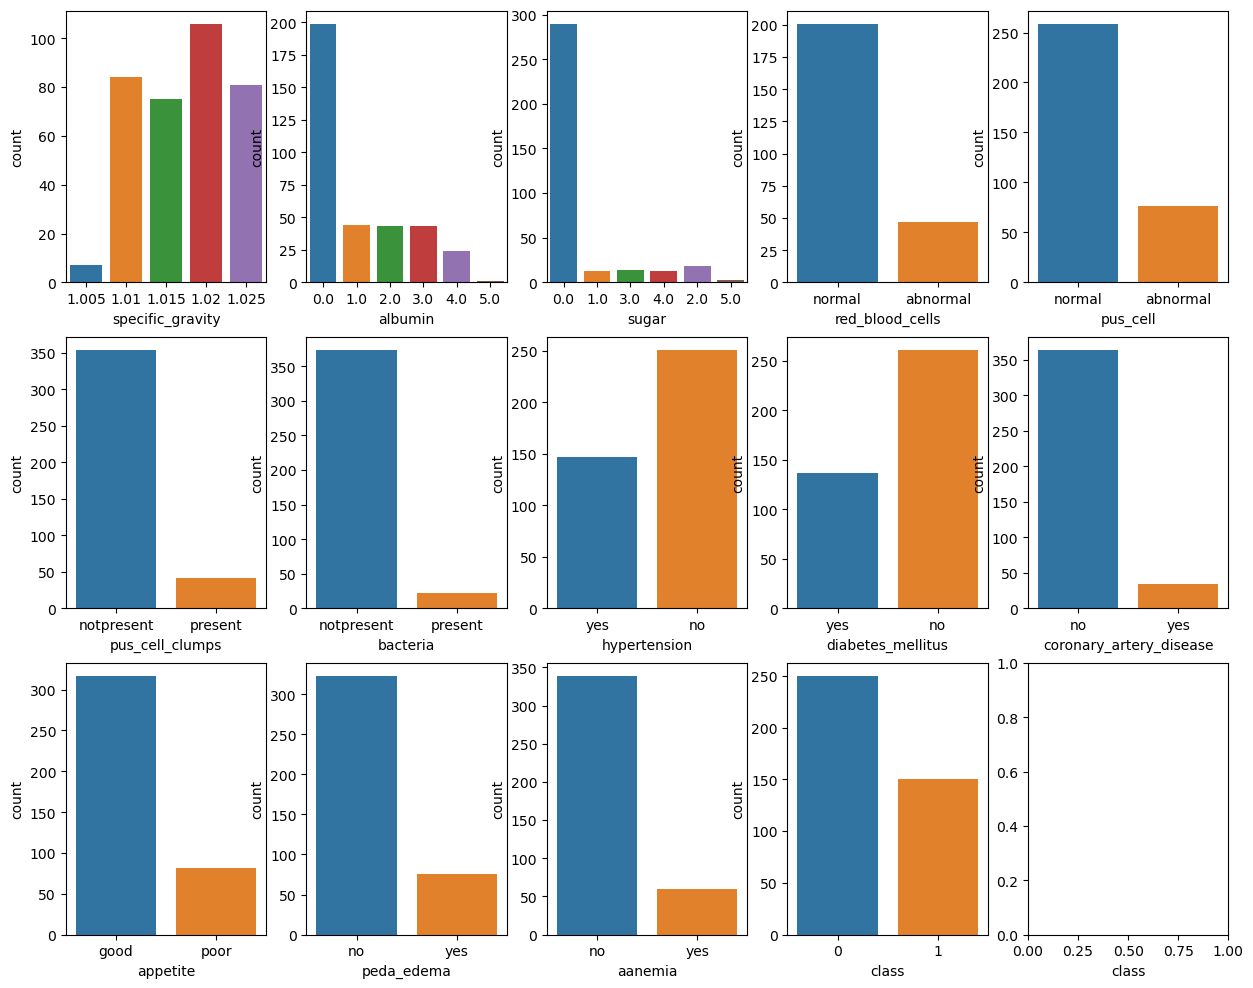

In [21]:
#checking categorical features distribution

#creating subplots

fig,axes= plt.subplots(3,5,figsize=(15,12))

axes=axes.ravel()# flattening the array makes indexing easier

# loop over cat cols and plot countplot
for col, ax in zip(cat_cols,axes):
    sns.countplot(chronic_df,x=col,ax=ax)
    plt.xlabel(col)

<Axes: >

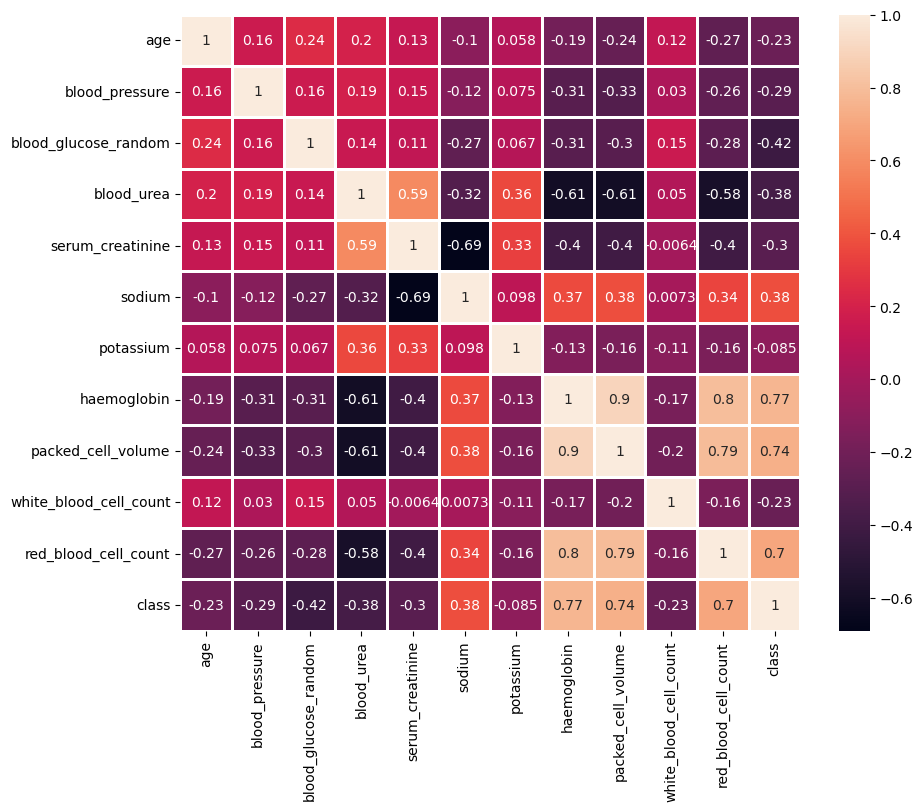

In [22]:
# correlated heatmap of data

num_df= chronic_df.select_dtypes(include='number')

plt.figure(figsize = (10, 8))

sns.heatmap(num_df.corr(),annot=True,linewidth=2,color='lightgrey')





In [23]:
# let's check count of null values in whole df

chronic_df.isnull().sum().sort_values(ascending=False)


red_blood_cells            152
red_blood_cell_count       131
white_blood_cell_count     106
potassium                   88
sodium                      87
packed_cell_volume          71
pus_cell                    65
haemoglobin                 52
sugar                       49
specific_gravity            47
albumin                     46
blood_glucose_random        44
blood_urea                  19
serum_creatinine            17
blood_pressure              12
age                          9
bacteria                     4
pus_cell_clumps              4
hypertension                 2
diabetes_mellitus            2
coronary_artery_disease      2
appetite                     1
peda_edema                   1
aanemia                      1
class                        0
dtype: int64

In [24]:
# let's check count of null values in num_cols

chronic_df[num_cols].isnull().sum().sort_values(ascending=False)

red_blood_cell_count      131
white_blood_cell_count    106
potassium                  88
sodium                     87
packed_cell_volume         71
haemoglobin                52
blood_glucose_random       44
blood_urea                 19
serum_creatinine           17
blood_pressure             12
age                         9
dtype: int64

In [25]:
# let's check count of null values in cat cols

chronic_df[cat_cols].isnull().sum().sort_values(ascending=False)



red_blood_cells            152
pus_cell                    65
sugar                       49
specific_gravity            47
albumin                     46
pus_cell_clumps              4
bacteria                     4
hypertension                 2
diabetes_mellitus            2
coronary_artery_disease      2
appetite                     1
peda_edema                   1
aanemia                      1
class                        0
dtype: int64

### Missing Value Treatment

In [26]:
# filling null values, we will use two methods, random sampling for higher null values and
# mean/mode sampling for lower null values

# creating func for imputing random values

def random_value_imputation(feature):
    random= chronic_df[feature].dropna().sample(chronic_df[feature].isna().sum())
    random.index=chronic_df[chronic_df[feature].isnull()].index
    chronic_df.loc[chronic_df[feature].isnull(),feature]=random


# creating func for imputing most common value(modal value)

def mode_impute(feature):
    mode=chronic_df[feature].mode()[0]
    chronic_df[feature] = chronic_df[feature].fillna(mode)

In [27]:
# filling num_cols null values using random sampling method

for col in num_cols:
    random_value_imputation(col)

In [28]:
# let's check count of null values in num_cols again

chronic_df[num_cols].isnull().sum().sort_values(ascending=False)




age                       0
blood_pressure            0
blood_glucose_random      0
blood_urea                0
serum_creatinine          0
sodium                    0
potassium                 0
haemoglobin               0
packed_cell_volume        0
white_blood_cell_count    0
red_blood_cell_count      0
dtype: int64

In [29]:
# filling "red_blood_cells" and "pus_cell" using random sampling method and rest of cat_cols using mode imputation


for col in ["red_blood_cells","pus_cell"]:
    random_value_imputation(col)

for col1 in cat_cols:
    mode_impute(col1)



In [30]:
# let's check count of null values in cat_cols again

chronic_df[cat_cols].isnull().sum().sort_values(ascending=False)


specific_gravity           0
albumin                    0
sugar                      0
red_blood_cells            0
pus_cell                   0
pus_cell_clumps            0
bacteria                   0
hypertension               0
diabetes_mellitus          0
coronary_artery_disease    0
appetite                   0
peda_edema                 0
aanemia                    0
class                      0
dtype: int64

In [31]:
# check unique values in each cat col by looping over cat cols

for col in cat_cols:
    print(f"{col} has {chronic_df[col].nunique()} categories\n")





specific_gravity has 5 categories

albumin has 6 categories

sugar has 6 categories

red_blood_cells has 2 categories

pus_cell has 2 categories

pus_cell_clumps has 2 categories

bacteria has 2 categories

hypertension has 2 categories

diabetes_mellitus has 2 categories

coronary_artery_disease has 2 categories

appetite has 2 categories

peda_edema has 2 categories

aanemia has 2 categories

class has 2 categories



In [32]:
# using labelencoder and applying on cat cols
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in cat_cols[3:]:
    chronic_df[col] = le.fit_transform(chronic_df[col])

In [33]:
# check chronic df after transforming cat cols

chronic_df.head()



,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,haemoglobin,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia,class
0,48.0,80.0,1.020,1.0,0.0,1,1,0,0,121.0,36.0,1.2,138.0,4.8,15.4,44.0,7800.0,5.2,1,1,0,0,0,0,0
1,7.0,50.0,1.020,4.0,0.0,1,1,0,0,360.0,18.0,0.8,145.0,3.7,11.3,38.0,6000.0,5.6,0,0,0,0,0,0,0
2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,423.0,53.0,1.8,146.0,4.4,9.6,31.0,7500.0,2.1,0,1,0,1,0,1,0
3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.0,56.0,3.8,111.0,2.5,11.2,32.0,6700.0,3.9,1,0,0,1,1,1,0
4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,106.0,26.0,1.4,145.0,5.4,11.6,35.0,7300.0,4.6,0,0,0,0,0,0,0


In [127]:
chronic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      400 non-null    float64
 1   blood_pressure           400 non-null    float64
 2   specific_gravity         400 non-null    float64
 3   albumin                  400 non-null    float64
 4   sugar                    400 non-null    float64
 5   red_blood_cells          400 non-null    int32  
 6   pus_cell                 400 non-null    int32  
 7   pus_cell_clumps          400 non-null    int32  
 8   bacteria                 400 non-null    int32  
 9   blood_glucose_random     400 non-null    float64
 10  blood_urea               400 non-null    float64
 11  serum_creatinine         400 non-null    float64
 12  sodium                   400 non-null    float64
 13  potassium                400 non-null    float64
 14  haemoglobin              4

In [34]:
# Split data into features and target variables (X and y)
x = chronic_df.drop('class',axis=1)
y = chronic_df['class']




In [35]:
# splitting data intp training and test set, so import train_test_split

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=.3,random_state=0)





## MODEL BUILDING

In [36]:
#importing necessary libraries and metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB

In [57]:
from sklearn.metrics import classification_report,confusion_matrix,f1_score

### Cross Validation

In [37]:
from sklearn.model_selection import cross_val_score


In [38]:
def cross_validation(models,names):

    for model,name in zip(models,names):
        scores=cross_val_score(estimator=model,X=x,y=y,cv=5,scoring='accuracy')
        score_avg=np.mean(scores)
        print(f'Cross val score of {name} model: {score_avg}')

In [39]:
models=[LogisticRegression(),DecisionTreeClassifier(),RandomForestClassifier(),KNeighborsClassifier(),GradientBoostingClassifier(),AdaBoostClassifier(),XGBClassifier(),SVC(),BernoulliNB()]
names=['Logistic Regression','Decision Tree Classifier','Random Forest Classifier','KNeighbors Classifier','Gradient Boosting Classifier','AdaBoostClassifier','XGBClassifier','SVC','BernoulliNB']

In [40]:
cross_validation(models,names)

Cross val score of Logistic Regression model: 0.8724999999999999
Cross val score of Decision Tree Classifier model: 0.9625
Cross val score of Random Forest Classifier model: 0.9824999999999999
Cross val score of KNeighbors Classifier model: nan
Cross val score of Gradient Boosting Classifier model: 0.985
Cross val score of AdaBoostClassifier model: 0.985
Cross val score of XGBClassifier model: 0.975
Cross val score of SVC model: 0.625
Cross val score of BernoulliNB model: 0.9475


From above we can see Random Forest Classifier, Gradient Boosting Classifier, AdaBoostClassifier and XGBClassifier gives best accuracies.
Let's perform hyperparameter tuning on each of them.

### Hyperparameter tuning

In [42]:
#importing GridSearchCV for hyperparameter tuning

from sklearn.model_selection import GridSearchCV

In [69]:
# Initialize an empty DataFrame
results = []

#function for hyperparameter tuning

def  hyperparameter_tuning(model,params,model_name):
    
    grid_search=GridSearchCV(estimator=model,param_grid=params,cv=5,n_jobs=-1,scoring='accuracy')
    grid_search.fit(x_train,y_train)
    
    print("Best Parameters:", grid_search.best_params_)
    
    # Get the best model
    best_model = grid_search.best_estimator_

    # Evaluate the best model
    accuracy = best_model.score(x_test, y_test)
    print("Accuracy:", accuracy)
    
    #confusion matrix and clasification report
    
    y_pred=best_model.predict(x_test)
    
    print('confusion matrix:\n', confusion_matrix(y_test,y_pred))
    
    print('\nclassification report:\n', classification_report(y_test,y_pred))
    
    print('f1 score: ', f1_score(y_test,y_pred))
    
    results.append({'Model': model_name, 'Accuracy': accuracy, 'F1 Score': f1_score(y_test,y_pred)})


    

Let's do hyperparameter tuning for each selected classifier

##### Random Forest Classifier

In [70]:
model=RandomForestClassifier()
params= {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],   # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],   # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4],     # Minimum number of samples required at each leaf node
    'max_features': ['auto', 'sqrt'],  # Number of features to consider when looking for the best split
}


hyperparameter_tuning(model,params,'Random Forest Classifier')

Best Parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Accuracy: 0.9833333333333333
confusion matrix:
 [[72  0]
 [ 2 46]]

classification report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99        72
           1       1.00      0.96      0.98        48

    accuracy                           0.98       120
   macro avg       0.99      0.98      0.98       120
weighted avg       0.98      0.98      0.98       120

f1 score:  0.9787234042553191


##### Gradient Boosting Classifier

In [71]:
model=GradientBoostingClassifier()

params = {
    'n_estimators': [100, 200, 300],  # Number of boosting stages (trees)
    'learning_rate': [0.01, 0.1, 0.5], # Learning rate shrinks the contribution of each tree
    'max_depth': [3, 4, 5],            # Maximum depth of the individual trees
    'min_samples_split': [2, 5, 10],   # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4],     # Minimum number of samples required at each leaf node
    'max_features': ['auto', 'sqrt'],  # Number of features to consider when looking for the best split
}

hyperparameter_tuning(model,params,'Gradient Boosting Classifier')

Best Parameters: {'learning_rate': 0.1, 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Accuracy: 0.9833333333333333
confusion matrix:
 [[72  0]
 [ 2 46]]

classification report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99        72
           1       1.00      0.96      0.98        48

    accuracy                           0.98       120
   macro avg       0.99      0.98      0.98       120
weighted avg       0.98      0.98      0.98       120

f1 score:  0.9787234042553191


##### AdaBoostClassifier

In [72]:
model=AdaBoostClassifier()

params = {
    'n_estimators': [50, 100, 200],     # Number of weak learners to train iteratively
    'learning_rate': [0.01, 0.1, 0.5, 1] # Learning rate shrinks the contribution of each weak learner
}

hyperparameter_tuning(model,params,'AdaBoostClassifier')

Best Parameters: {'learning_rate': 0.5, 'n_estimators': 100}
Accuracy: 1.0
confusion matrix:
 [[72  0]
 [ 0 48]]

classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        72
           1       1.00      1.00      1.00        48

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120

f1 score:  1.0


##### XGBClassifier

In [ ]:
# model=XGBClassifier()

params = {
    'n_estimators': [100, 200, 300],       # Number of boosting rounds (trees)
    'learning_rate': [0.01, 0.1, 0.5],     # Boosting learning rate
    'max_depth': [3, 4, 5],                # Maximum depth of a tree
    'min_child_weight': [1, 3, 5],         # Minimum sum of instance weight needed in a child
}

hyperparameter_tuning(model,params,'XGBClassifier')

In [77]:
#putting models and their accuracy and f1 score in a dataframe
results_df=pd.DataFrame(results)
results_df

,Model,Accuracy,F1 Score
0,Random Forest Classifier,0.983333,0.978723
1,Gradient Boosting Classifier,0.983333,0.978723
2,AdaBoostClassifier,1.000000,1.000000
3,XGBClassifier,0.966667,0.956522


##### From above we can see that Random Forest Classifier model and Gradient Boosting Classifier model gives the best results. Here we choose Random Forest Classifier model for our predictions

##### Feature Elimination

since we have 24 features, we select the best 10 features using Recursive Feature Elimination

In [118]:
from sklearn.feature_selection import RFE

classifier = RandomForestClassifier(max_depth=None,
                                    max_features='sqrt',
                                    min_samples_leaf=1,
                                    min_samples_split=2,
                                    n_estimators=100,
                                   random_state=42)

# Create the RFE model and select 10 features
rfe = RFE(estimator=classifier, n_features_to_select=10, step=1)

# Fit the RFE model
rfe.fit(x_train, y_train)

# Get the selected features
selected_features = rfe.support_
print("Selected Features:", selected_features)

# Get the ranking of each feature
feature_ranking = rfe.ranking_
print("Feature Ranking:", feature_ranking)

# Transform the dataset to include only the selected features
X_train_selected = rfe.transform(x_train)
X_test_selected = rfe.transform(x_test)

# Train your classifier on the selected features
classifier.fit(X_train_selected, y_train)

y_pred=classifier.predict(X_test_selected)
# Evaluate the classifier
accuracy = classifier.score(X_test_selected, y_test)
print("Accuracy:", accuracy)
print('f1 score:', f1_score(y_test,y_pred))

Selected Features: [False False  True  True False False False False False  True  True  True
 False False  True  True False  True  True  True False False False False]
Feature Ranking: [ 2  5  1  1 10  9  8 13 14  1  1  1  6 11  1  1  7  1  1  1 15  4  3 12]
Accuracy: 0.9833333333333333
f1 score: 0.9787234042553191


We can see that acccuracy and f1 score after RFE is same as that before performing RFE.

So we take the 10 columns for prediction

In [119]:
## The columns selected are

features=[x.columns[i] for i in range(len(x.columns)) if feature_ranking[i]==1]
    
features

['specific_gravity',
 'albumin',
 'blood_glucose_random',
 'blood_urea',
 'serum_creatinine',
 'haemoglobin',
 'packed_cell_volume',
 'red_blood_cell_count',
 'hypertension',
 'diabetes_mellitus']

## Prediction

In [151]:
specific_gravity= float(input('Specific Gravity (Available options: [1.02 , 1.01 , 1.005 , 1.015 , 1.025)'))
albumin= float(input('Albumin (Available options: [1 , 4 , 2 , 3 , 0 , 5]'))
blood_glucose_random= float(input('blood glucose random:'))
blood_urea= float(input('blood urea:'))
serum_creatinine= float(input('serum creatinine:'))                            
haemoglobin= float(input('haemoglobin:'))
packed_cell_volume= float(input('packed cell volume:'))                            
red_blood_cell_count= float(input('red_blood_cell_count:'))                            
hypertension=  float(input("hypertension:YES or NO [if 'yes' enter 1 , if 'no' enter 0]"))                          
diabetes_mellitus = float(input("diabetes mellitus: YES or NO [if 'yes' enter 1 , if 'no' enter 0]"))              
            

                         
prediction= classifier.predict([[specific_gravity,albumin,blood_glucose_random,blood_urea,serum_creatinine,
                                 haemoglobin,packed_cell_volume,red_blood_cell_count,hypertension,diabetes_mellitus]])
                         
if prediction==0:
    print('\n\nPatient has Chronic Kidney Disease')
else:
    print('\n\nPatient does not have Chronic Kidney Disease')
                         
                         
                         

Specific Gravity (Available options: [1.02 , 1.01 , 1.005 , 1.015 , 1.025)1.01
Albumin (Available options: [1 , 4 , 2 , 3 , 0 , 5]3
blood glucose random:129
blood urea:158
serum creatinine:11.8
haemoglobin:8.1
packed cell volume:24
red_blood_cell_count:3.5
hypertension:YES or NO [if 'yes' enter 1 , if 'no' enter 0]1
diabetes mellitus: YES or NO [if 'yes' enter 1 , if 'no' enter 0]1


Patient has Chronic Kidney Disease


In [133]:

X_test_selected[3]


array([  1.01,   3.  , 129.  , 158.  ,  11.8 ,   8.1 ,  24.  ,   3.5 ,
         1.  ,   1.  ])

In [146]:
classifier.predict([X_test_selected[1]])

array([1], dtype=int64)